In [1]:
import numpy as np
import skfda
from skfda.preprocessing.dim_reduction.projection import FPCABasis, FPCAGrid, RegularizationParameterSearch, FPCARegularizationCVScorer
from skfda.representation import FDataBasis, FDataGrid
from skfda.datasets._real_datasets import fetch_growth, fetch_weather
from matplotlib import pyplot as plt
from matplotlib import pyplot
from skfda.representation.basis import Fourier, BSpline, Monomial
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold

def fetch_weather_temp_only():
    weather_dataset = fetch_weather()
    fd_data = weather_dataset['data']
    fd_data.data_matrix = fd_data.data_matrix[:, :, :1]
    fd_data.axes_labels = fd_data.axes_labels[:-1]
    return fd_data


def inner_product_regularized(first,
                              second,
                              derivative_degree,
                              regularization_parameter):
    return first.inner_product(second) + \
           regularization_parameter * \
           first.derivative(derivative_degree).\
           inner_product(second.derivative(derivative_degree))


In [2]:
np.set_printoptions(linewidth=400)

In [3]:
derivative_degree=2

In [4]:
def plot_results(params, results):
    pyplot.plot(params, results)
    pyplot.show()

La dependencia del parámetro lambda es lineal, como es de esperar de la fórmula del producto interior regularizado

In [13]:
fd_data = fetch_weather_temp_only()
basis = skfda.representation.basis.Fourier(n_basis=9, domain_range=(0, 365))
fd_basis = fd_data.to_basis(basis)
finder1_params = [10**i for i in range(-1, 6)]
finder1 = RegularizationParameterSearch(estimator=FPCABasis(regularization_lfd=2),
                                       param_values=finder1_params,
                                       scoring=FPCARegularizationCVScorer(),
                                       verbose=True,
                                       n_jobs=12,
                                       cv=KFold(5))

finder1.fit(fd_basis)
print(finder1.cv_results_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  35 out of  35 | elapsed:   37.2s finished


{'mean_fit_time': array([1.13132215, 1.10386567, 1.12467022, 1.09972286, 1.1043716 , 1.08459897, 1.00745912]), 'std_fit_time': array([0.02175211, 0.02106356, 0.03630956, 0.0057886 , 0.00890451, 0.00476719, 0.1477706 ]), 'mean_score_time': array([10.61591959, 10.61138134, 10.60133448, 10.58241863, 10.62679591,  8.9183249 ,  8.52419558]), 'std_score_time': array([0.18289788, 0.16568435, 0.16703612, 0.09647947, 0.36735096, 0.45992709, 1.46764806]), 'param_regularization_parameter': masked_array(data=[0.1, 1, 10, 100, 1000, 10000, 100000],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'regularization_parameter': 0.1}, {'regularization_parameter': 1}, {'regularization_parameter': 10}, {'regularization_parameter': 100}, {'regularization_parameter': 1000}, {'regularization_parameter': 10000}, {'regularization_parameter': 100000}], 'split0_test_score': array([-15182.8308209 , -15182.81314488, -15182.63643789, 

In [14]:
# KFold Scores
finder1.cv_results_['mean_test_score']

array([-26874.52746248, -26874.49547856, -26874.1757221 , -26870.98640729, -26839.89648659, -26592.11091859, -25747.27958257])

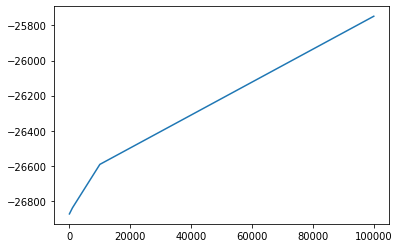

In [15]:
plot_results(finder1_params,finder1.cv_results_['mean_test_score'])

In [19]:
fd_data = fetch_weather_temp_only()
basis = skfda.representation.basis.Fourier(n_basis=9, domain_range=(0, 365))
fd_basis = fd_data.to_basis(basis)
finder1_params = [10**i for i in range(5, 10)]
finder1 = RegularizationParameterSearch(estimator=FPCABasis(regularization_lfd=2),
                                       param_values=finder1_params,
                                       scoring=FPCARegularizationCVScorer(),
                                       verbose=True,
                                       n_jobs=12,
                                       cv=KFold(5))

finder1.fit(fd_basis)
print(finder1.cv_results_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  25 out of  25 | elapsed:   28.2s finished


{'mean_fit_time': array([1.19963841, 1.26503067, 1.27918344, 1.16165142, 1.1560689 ]), 'std_fit_time': array([0.01901258, 0.08201399, 0.08213876, 0.04446251, 0.13098751]), 'mean_score_time': array([11.38318815, 10.40082974,  9.98145485,  9.58017545,  7.40661435]), 'std_score_time': array([0.45856599, 0.36058832, 0.48189006, 0.15788799, 2.56318194]), 'param_regularization_parameter': masked_array(data=[100000, 1000000, 10000000, 100000000, 1000000000],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'regularization_parameter': 100000}, {'regularization_parameter': 1000000}, {'regularization_parameter': 10000000}, {'regularization_parameter': 100000000}, {'regularization_parameter': 1000000000}], 'split0_test_score': array([-14750.53978289, -14994.1351075 , -18406.13543739, -25499.37428504, -27482.90422269]), 'split1_test_score': array([-9319.86907241, -9256.47717715, -7315.33074434, -6408.40377012, -6477.87618115]), 's

In [23]:
1e5

100000.0

In [20]:
# KFold Scores
finder1.cv_results_['mean_test_score']

array([-25747.27958257, -24418.17904063, -26525.85879877, -38323.14072044, -42326.20448792])

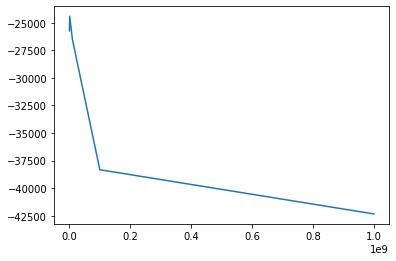

In [21]:
plot_results(finder1_params,finder1.cv_results_['mean_test_score'])

In [4]:
# Leave One Out scores
finder1.cv_results_['mean_test_score']

array([-3035.70345943, -3035.68704489, -3035.67064175, -3035.65425   ,
       -3035.63786962, -3035.62150061])

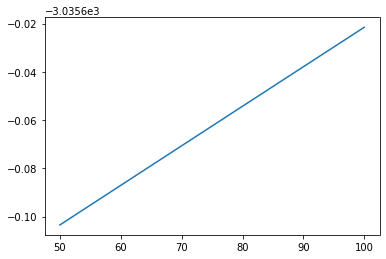

In [14]:
plot_results(list(range(50, 101, 10)),[-3035.70345943, -3035.68704489, -3035.67064175, -3035.65425   ,
       -3035.63786962, -3035.62150061])

In [17]:
fd_data = fetch_weather_temp_only()
basis = skfda.representation.basis.Fourier(n_basis=9, domain_range=(0, 365))
fd_basis = fd_data.to_basis(basis)
finder1_params = [10**i for i in range(2, 8)]
finder1 = RegularizationParameterSearch(estimator=FPCABasis(regularization_lfd=2),
                                       param_values=finder1_params,
                                       scoring=FPCARegularizationCVScorer(),
                                       verbose=True,
                                       n_jobs=12)

finder1.fit(fd_basis)
print(finder1.cv_results_)

Fitting 35 folds for each of 7 candidates, totalling 245 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:   11.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:   46.5s
[Parallel(n_jobs=12)]: Done 245 out of 245 | elapsed:  1.0min finished


{'mean_fit_time': array([1.21730115, 1.16600686, 1.20994453, 1.20908292, 1.16674933, 1.15323921, 1.14886285]), 'std_fit_time': array([0.10927032, 0.09299549, 0.0874016 , 0.10966046, 0.11063082, 0.09065879, 0.14045911]), 'mean_score_time': array([1.60718996, 1.59399988, 1.6909418 , 1.65827526, 1.56546578, 1.61406042, 1.43023293]), 'std_score_time': array([0.10133297, 0.10507518, 0.13533123, 0.13342185, 0.07013364, 0.14463707, 0.33953373]), 'param_regularization_parameter': masked_array(data=[0.1, 1, 10, 100, 1000, 10000, 100000],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'regularization_parameter': 0.1}, {'regularization_parameter': 1}, {'regularization_parameter': 10}, {'regularization_parameter': 100}, {'regularization_parameter': 1000}, {'regularization_parameter': 10000}, {'regularization_parameter': 100000}], 'split0_test_score': array([-4007.69624928, -4007.69402322, -4007.67177027, -4007.4500

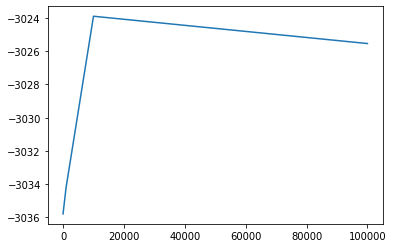

In [18]:
plot_results(finder1_params,finder1.cv_results_['mean_test_score'])

In [5]:
fd_data = fetch_weather_temp_only()
basis = skfda.representation.basis.Fourier(n_basis=9, domain_range=(0, 365))
fd_basis = fd_data.to_basis(basis)
finder1 = RegularizationParameterSearch(estimator=FPCABasis(regularization_lfd=2),
                                       param_values=list(range(50, 101, 10)),
                                       scoring=FPCARegularizationCVScorer(),
                                       verbose=True,
                                       n_jobs=12)

finder1.fit(fd_basis)
print(finder1.cv_results_)

Fitting 35 folds for each of 6 candidates, totalling 210 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:   11.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:   45.4s
[Parallel(n_jobs=12)]: Done 210 out of 210 | elapsed:   52.1s finished


{'mean_fit_time': array([1.1245943 , 1.13730905, 1.11492243, 1.14567303, 1.1533544 , 1.11938011]), 'std_fit_time': array([0.05475619, 0.07570959, 0.05014831, 0.09292487, 0.08402619, 0.09384382]), 'mean_score_time': array([1.60980266, 1.56775801, 1.56256614, 1.61324539, 1.61835506, 1.45340787]), 'std_score_time': array([0.12324082, 0.10672792, 0.07272748, 0.10724409, 0.09268854, 0.27608232]), 'param_regularization_parameter': masked_array(data=[50, 60, 70, 80, 90, 100],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'regularization_parameter': 50}, {'regularization_parameter': 60}, {'regularization_parameter': 70}, {'regularization_parameter': 80}, {'regularization_parameter': 90}, {'regularization_parameter': 100}], 'split0_test_score': array([-4007.57303588, -4007.54839498, -4007.52377112, -4007.49916431, -4007.47457451, -4007.45000173]), 'split1_test_score': array([-1020.72125966, -1020.71914053, -1020.71702

In [6]:
finder1.cv_results_['mean_test_score']

array([-3035.70345943, -3035.68704489, -3035.67064175, -3035.65425   , -3035.63786962, -3035.62150061])

In [9]:
# Good one
finder1.cv_results_['mean_test_score']

array([-3035.70345943, -3035.68704489, -3035.67064175, -3035.65425   , -3035.63786962, -3035.62150061])

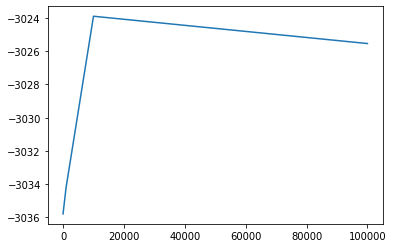

In [23]:
plot_results(finder1_params,finder1.cv_results_['mean_test_score'])

In [4]:
finder1.cv_results_['mean_test_score']

array([-3035.70345943, -3035.68704489, -3035.67064175, -3035.65425   ,
       -3035.63786962, -3035.62150061])

In [9]:
finder1.cv_results_['mean_test_score']

array([-3035.70345943, -3035.68704489, -3035.67064175, -3035.65425   , -3035.63786962, -3035.62150061])

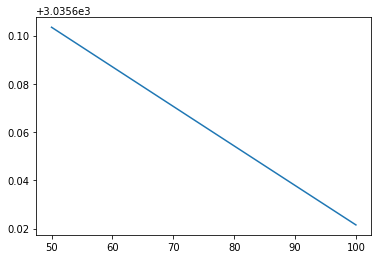

In [10]:
plot_results(list(range(50, 101, 10)), -finder1.cv_results_['mean_test_score'])

In [11]:
f2_params = list(range(110, 1000, 100))
finder2 = RegularizationParameterSearch(estimator=FPCABasis(regularization_derivative_degree=2),
                                       param_values=f2_params,
                                       scoring=FPCARegularizationCVScorer(),
                                       verbose=True,
                                       n_jobs=12)

finder2.fit(fd_basis)

Fitting 35 folds for each of 9 candidates, totalling 315 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    7.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:   26.0s
[Parallel(n_jobs=12)]: Done 315 out of 315 | elapsed:   42.8s finished


RegularizationParameterSearch(estimator=FPCABasis(centering=True,
                                                  components_basis=None,
                                                  n_components=9,
                                                  regularization_coefficients=None,
                                                  regularization_derivative_degree=2,
                                                  regularization_parameter=0),
                              n_jobs=12, param_values=None,
                              scoring=<skfda.exploratory.fpca._regularization_param_search.FPCARegularizationCVScorer object at 0x7f8e029412d0>,
                              verbose=True)

In [12]:
finder2.cv_results_['mean_test_score']

array([-3035.60514295, -3035.44218925, -3035.28036206, -3035.11965296, -3034.96005366, -3034.80155593, -3034.64415163, -3034.48783272, -3034.33259125])

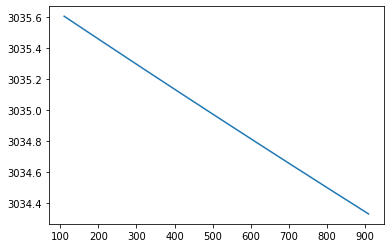

In [13]:
plot_results(f2_params, -finder2.cv_results_['mean_test_score'])

In [14]:
f3_params = list(range(1000, 2000, 100))
finder3 = RegularizationParameterSearch(estimator=FPCABasis(regularization_derivative_degree=2),
                                       param_values=f3_params,
                                       scoring=FPCARegularizationCVScorer(),
                                       verbose=True,
                                       n_jobs=12)

finder3.fit(fd_basis)

Fitting 35 folds for each of 10 candidates, totalling 350 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    7.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:   25.4s
[Parallel(n_jobs=12)]: Done 350 out of 350 | elapsed:   46.8s finished


RegularizationParameterSearch(estimator=FPCABasis(centering=True,
                                                  components_basis=None,
                                                  n_components=9,
                                                  regularization_coefficients=None,
                                                  regularization_derivative_degree=2,
                                                  regularization_parameter=0),
                              n_jobs=12, param_values=None,
                              scoring=<skfda.exploratory.fpca._regularization_param_search.FPCARegularizationCVScorer object at 0x7f8e02928410>,
                              verbose=True)

In [15]:
finder3.cv_results_['mean_test_score']

array([-3034.19378861, -3034.04057261, -3033.88841144, -3033.73729745, -3033.58722308, -3033.43818087, -3033.29016341, -3033.14316338, -3032.99717354, -3032.85218673])

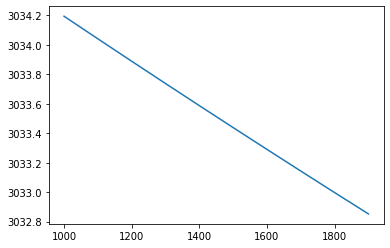

In [16]:
plot_results(f3_params, -finder3.cv_results_['mean_test_score'])

In [17]:
def param_scores(params):
    f = RegularizationParameterSearch(estimator=FPCABasis(regularization_derivative_degree=2),
                                       param_values=params,
                                       scoring=FPCARegularizationCVScorer(),
                                       verbose=True,
                                       n_jobs=12)

    f.fit(fd_basis)
    return f

In [18]:
f4_params = range(2000, 10000, 1000)
finder4 = param_scores(f4_params)

Fitting 35 folds for each of 8 candidates, totalling 280 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    7.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:   25.4s
[Parallel(n_jobs=12)]: Done 280 out of 280 | elapsed:   38.0s finished


In [19]:
finder4.cv_results_['mean_test_score']

array([-3032.70819584, -3031.32155423, -3030.02722329, -3028.81920683, -3027.69207781, -3026.64091176, -3025.66122719, -3024.74893142])

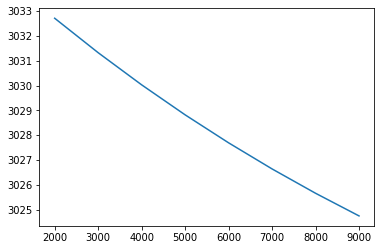

In [20]:
plot_results(f4_params, -finder4.cv_results_['mean_test_score'])

In [32]:
f5_params = range(10000, 100000, 10000)
finder5 = param_scores(f5_params)

Fitting 35 folds for each of 9 candidates, totalling 315 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    7.3s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:   26.4s
[Parallel(n_jobs=12)]: Done 315 out of 315 | elapsed:   43.3s finished


In [33]:
finder5.cv_results_['mean_test_score']

array([-3023.9002712 , -3018.25214163, -3016.14311283, -3015.9133416 , -3016.66175898, -3017.96406349, -3019.60571578, -3021.46324828, -3023.4589457 ])

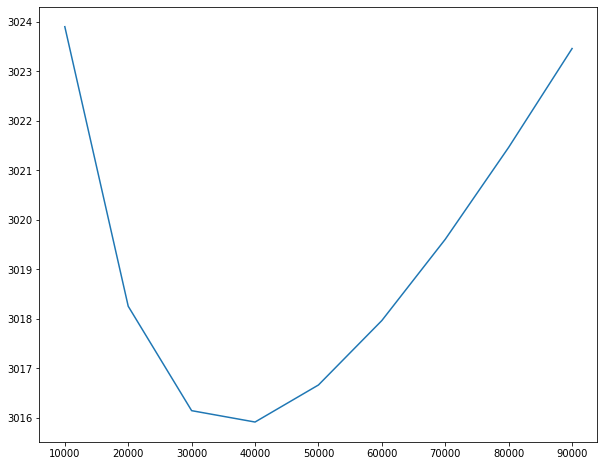

In [55]:
plot_results(f5_params, -finder5.cv_results_['mean_test_score'])

In [58]:
f6_params = range(31000, 40000, 1000)
finder6 = param_scores(f6_params)

Fitting 35 folds for each of 9 candidates, totalling 315 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    7.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:   25.4s
[Parallel(n_jobs=12)]: Done 315 out of 315 | elapsed:   42.0s finished


In [59]:
finder6.cv_results_['mean_test_score']

array([-3016.05582336, -3015.98544634, -3015.93086835, -3015.89105548, -3015.86504953, -3015.8519638 , -3015.85097866, -3015.86133703, -3015.88233984])

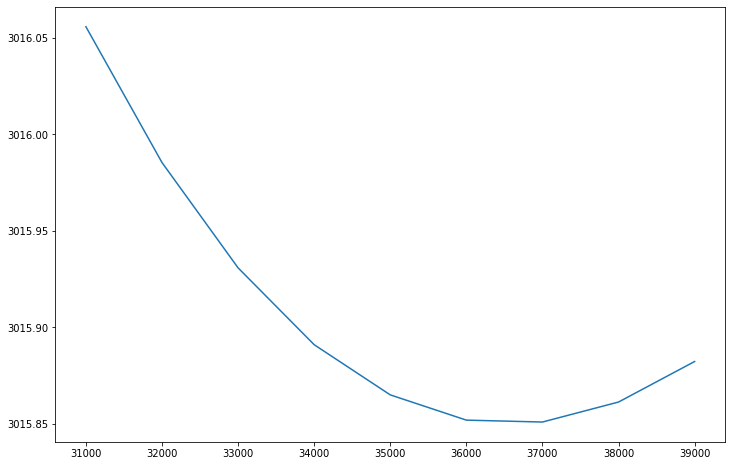

In [60]:
plot_results(f6_params, -finder6.cv_results_['mean_test_score'])

In [35]:
f1_params = list(range(50, 101, 10))

In [61]:
total_params = f1_params + list(f2_params) + list(f3_params) + list(f4_params) + list(f5_params)
total_params = total_params[:-6] + list(f6_params) + total_params[-6:]

In [62]:
total_params

[50,
 60,
 70,
 80,
 90,
 100,
 110,
 210,
 310,
 410,
 510,
 610,
 710,
 810,
 910,
 1000,
 1100,
 1200,
 1300,
 1400,
 1500,
 1600,
 1700,
 1800,
 1900,
 2000,
 3000,
 4000,
 5000,
 6000,
 7000,
 8000,
 9000,
 10000,
 20000,
 30000,
 31000,
 32000,
 33000,
 34000,
 35000,
 36000,
 37000,
 38000,
 39000,
 40000,
 50000,
 60000,
 70000,
 80000,
 90000]

In [63]:
total_scores = list(finder1.cv_results_['mean_test_score']) + \
               list(finder2.cv_results_['mean_test_score']) + \
               list(finder3.cv_results_['mean_test_score']) + \
               list(finder4.cv_results_['mean_test_score']) + \
               list(finder5.cv_results_['mean_test_score'])
total_scores = total_scores[:-6] + list(finder6.cv_results_['mean_test_score']) + total_scores[-6:]

In [64]:
total_scores

[-3035.7034594257407,
 -3035.6870448938257,
 -3035.6706417546275,
 -3035.6542499995617,
 -3035.6378696200563,
 -3035.6215006075518,
 -3035.6051429534896,
 -3035.442189252249,
 -3035.2803620554205,
 -3035.1196529613617,
 -3034.9600536589487,
 -3034.801555926381,
 -3034.6441516300333,
 -3034.487832723297,
 -3034.332591245458,
 -3034.1937886059213,
 -3034.0405726139925,
 -3033.888411440439,
 -3033.737297449078,
 -3033.5872230843443,
 -3033.43818087026,
 -3033.2901634094146,
 -3033.1431633819802,
 -3032.9971735447148,
 -3032.852186730008,
 -3032.7081958449135,
 -3031.3215542257462,
 -3030.027223285503,
 -3028.8192068284343,
 -3027.692077809423,
 -3026.6409117612243,
 -3025.661227185011,
 -3024.748931415456,
 -3023.9002712000033,
 -3018.2521416270383,
 -3016.143112827595,
 -3016.0558233594456,
 -3015.985446343225,
 -3015.930868349406,
 -3015.891055476727,
 -3015.8650495255174,
 -3015.8519637964964,
 -3015.850978661106,
 -3015.861337031669,
 -3015.8823398388718,
 -3015.9133416027935,
 -3016.

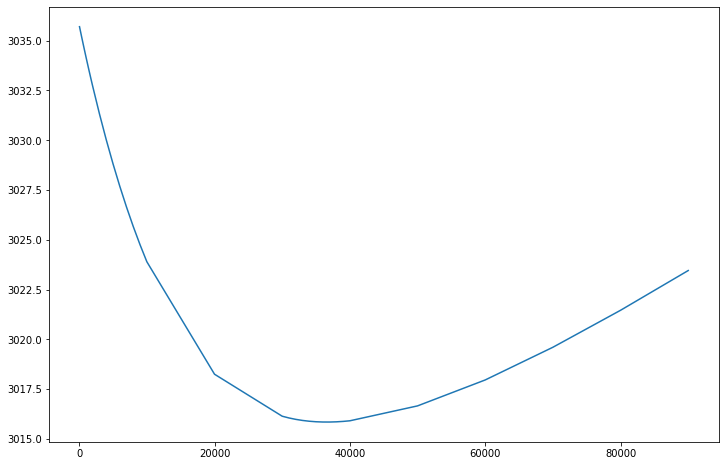

In [65]:
plot_results(total_params, -np.array(total_scores))

In [66]:
plt.rcParams["figure.figsize"]

[12.0, 8.0]

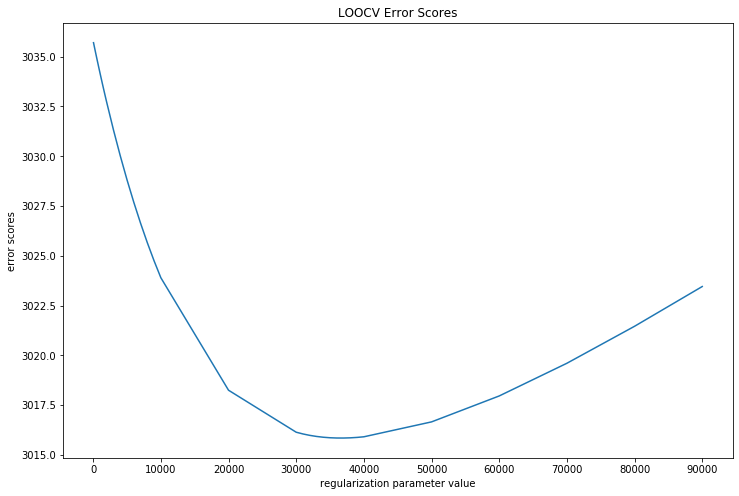

In [67]:
plt.title('LOOCV Error Scores')
plt.xlabel('regularization parameter value')
plt.ylabel('error scores')
plt.rcParams["figure.figsize"] = [12.0, 8.0]
plt.xticks(range(0, 100001, 10000))
plt.plot(total_params, -np.array(total_scores))
plt.show()

In [76]:
basis = Fourier(n_basis=9, domain_range=(0,365))
fd_basis = basis.to_basis()

In [77]:
inner_product_regularized(fd_basis, fd_basis, derivative_degree, 37000)

array([[ 1.00000000e+00,  4.61218864e-17, -5.93600689e-17, -9.22767379e-18, -4.94667241e-17, -5.18913244e-17, -2.58424225e-16,  3.59182954e-16, -1.43453500e-16],
       [ 4.61218864e-17,  1.00324900e+00, -6.09127916e-17,  3.53232550e-17, -7.70160678e-17,  8.08922389e-17,  3.65372301e-16,  4.62324571e-17,  1.50555065e-16],
       [-5.93600689e-17, -6.09127916e-17,  1.00324900e+00, -8.37662875e-17, -2.90873649e-16,  1.73618991e-16, -1.01726217e-16,  3.52898677e-17, -3.62973106e-16],
       [-9.22767379e-18,  3.53232550e-17, -8.37662875e-17,  1.05198400e+00,  2.52053023e-16,  6.86530174e-17,  1.23217896e-16,  2.22043580e-16,  5.74886258e-16],
       [-4.94667241e-17, -7.70160678e-17, -2.90873649e-16,  2.52053023e-16,  1.05198400e+00,  9.26407858e-17, -3.86190730e-16,  4.79353583e-16, -4.32710975e-16],
       [-5.18913244e-17,  8.08922389e-17,  1.73618991e-16,  6.86530174e-17,  9.26407858e-17,  1.26316902e+00,  5.39901003e-16, -2.96094539e-16,  2.06251187e-17],
       [-2.58424225e-16,  3.

## Without regularization

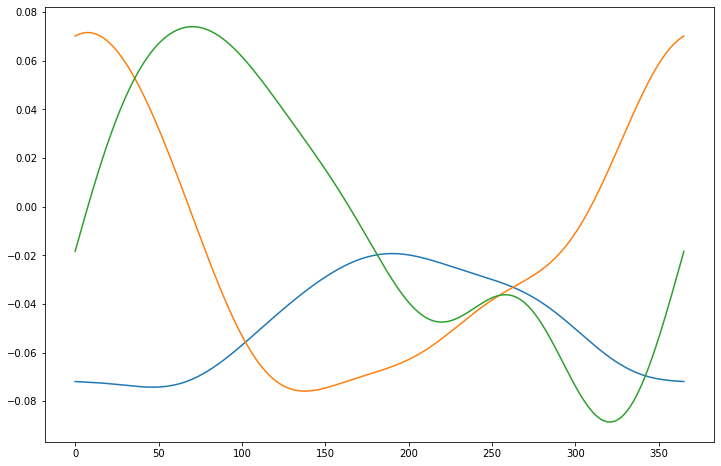

In [82]:
fd_data = fetch_weather_temp_only()
basis = skfda.representation.basis.Fourier(n_basis=9, domain_range=(0, 365))
fd_basis = fd_data.to_basis(basis)
fpca = FPCABasis()
fpca.fit(fd_basis)
fpca.components.plot()
pyplot.show()

In [83]:
fpca.components.coefficients

array([[-0.92315509, -0.1395638 , -0.35575705, -0.00877893,  0.02460726,  0.02932107,  0.0028108 ,  0.0099933 ,  0.00966803],
       [-0.33152114, -0.04318338,  0.89258995,  0.17111744,  0.24248046,  0.03645764,  0.03700911, -0.02547254,  0.00929921],
       [-0.13791077,  0.91248735, -0.00643356,  0.26200806, -0.21919225,  0.16909055,  0.02715257, -0.00513582,  0.04751159]])

## With regularization

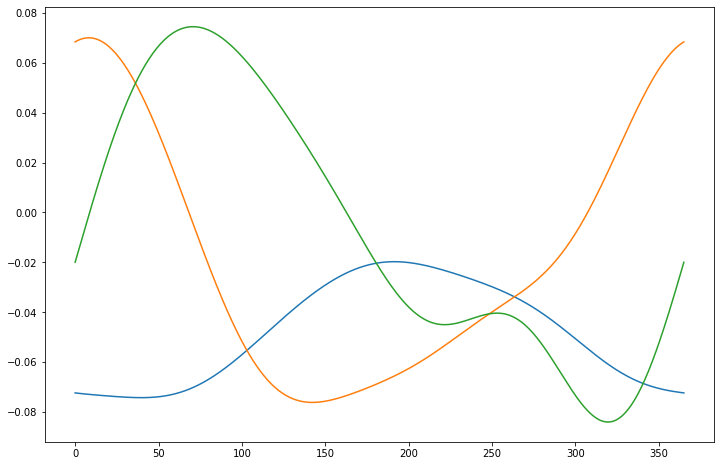

In [84]:
fd_data = fetch_weather_temp_only()
basis = skfda.representation.basis.Fourier(n_basis=9, domain_range=(0, 365))
fd_basis = fd_data.to_basis(basis)
fpca = FPCABasis(regularization_parameter=37000)
fpca.fit(fd_basis)
fpca.components.plot()
pyplot.show()

In [85]:
fpca.components.coefficients

array([[-0.92353538, -0.13917658, -0.3546806 , -0.00834547,  0.02340759,  0.02321556,  0.00222427,  0.00545705,  0.00527859],
       [-0.33227949, -0.04343476,  0.89373317,  0.16277245,  0.23063607,  0.02868221,  0.02920414, -0.01384772,  0.00497662],
       [-0.14046808,  0.91683385, -0.00424734,  0.24919524, -0.21220451,  0.1333818 ,  0.02076831, -0.0026984 ,  0.02566325]])

In [95]:
import numpy as np
from skfda.representation.grid import FDataGrid
from sklearn.model_selection import GridSearchCV, LeaveOneOut


def inner_product_regularized(first,
                              second,
                              derivative_degree,
                              regularization_parameter):
    return first.inner_product(second) + \
           regularization_parameter * \
           first.derivative(derivative_degree). \
               inner_product(second.derivative(derivative_degree))


class FPCARegularizationCVScorer:
    r""" This calculates the regularization score which is basically the norm
    of the orthogonal component to the projection of the data onto the
    components
    Args:
        estimator (Estimator): Linear smoothing estimator.
        X (FDataGrid): Functional data to smooth.
        y (FDataGrid): Functional data target. Should be the same as X.

    Returns:
        float: Cross validation score, with negative sign, as it is a
        penalization.

    """

    def __call__(self, estimator, X, y=None):
        projection_coefficients = inner_product_regularized(X,
                                                            estimator.components,
                                                            estimator.regularization_derivative_degree,
                                                            estimator.regularization_parameter)[
            0]

        for i in range(len(projection_coefficients)):
            estimator.components.coefficients[i] *= projection_coefficients[i]
        data_copy = X.copy(coefficients=np.copy(np.squeeze(X.coefficients)))

        result = 0

        for i in range(estimator.components.n_samples):
            data_copy.coefficients -= estimator.components.coefficients[i]
            
            #result += inner_product_regularized(data_copy, data_copy,
            #                                    estimator.regularization_derivative_degree,
            #                                    estimator.regularization_parameter)
        result = data_copy.inner_product(data_copy)
        return -result


class RegularizationParameterSearchAlt(GridSearchCV):
    """Chooses the best smoothing parameter and performs smoothing.


    Args:
        estimator (smoother estimator): scikit-learn compatible smoother.
        param_values (iterable): iterable containing the values to test
            for *smoothing_parameter*.
        scoring (scoring method): scoring method used to measure the
            performance of the smoothing. If ``None`` (the default) the
            ``score`` method of the estimator is used.
        n_jobs (int or None, optional (default=None)):
            Number of jobs to run in parallel.
            ``None`` means 1 unless in a :obj:`joblib.parallel_backend`
            context. ``-1`` means using all processors. See
            :term:`scikit-learn Glossary <sklearn:n_jobs>` for more details.

        pre_dispatch (int, or string, optional):
            Controls the number of jobs that get dispatched during parallel
            execution. Reducing this number can be useful to avoid an
            explosion of memory consumption when more jobs get dispatched
            than CPUs can process. This parameter can be:

            - None, in which case all the jobs are immediately
              created and spawned. Use this for lightweight and
              fast-running jobs, to avoid delays due to on-demand
              spawning of the jobs

            - An int, giving the exact number of total jobs that are
              spawned

            - A string, giving an expression as a function of n_jobs,
              as in '2*n_jobs'
        verbose (integer):
            Controls the verbosity: the higher, the more messages.

        error_score ('raise' or numeric):
            Value to assign to the score if an error occurs in estimator
            fitting. If set to 'raise', the error is raised. If a numeric
            value is given, FitFailedWarning is raised. This parameter does
            not affect the refit step, which will always raise the error.
            Default is np.nan.
    """

    def __init__(self, estimator, param_values, *, scoring=None, n_jobs=None,
                 verbose=0, n_components=1):
        super().__init__(estimator=estimator, scoring=scoring,
                         param_grid={'regularization_parameter': param_values},
                         n_jobs=n_jobs,
                         refit=True, cv=LeaveOneOut(),
                         verbose=verbose)
        self.components_basis = estimator.components_basis
        self.n_components = n_components

    def fit(self, X, y=None, groups=None, **fit_params):

        X -= X.mean()

        if not self.components_basis:
            self.components_basis = X.basis.copy()

        # the maximum number of components only depends on the target basis
        max_components = self.components_basis.n_basis

        # and it cannot be bigger than the number of samples-1, as we are using
        # leave one out cross validation
        if max_components > X.n_samples:
            raise AttributeError("The target basis must have less n_basis"
                                 "than the number of samples - 1")

        self.estimator.n_components = self.n_components

        return super().fit(X, y, groups=groups, **fit_params)


In [101]:
fd_data = fetch_weather_temp_only()
basis = skfda.representation.basis.Fourier(n_basis=9, domain_range=(0, 365))
fd_basis = fd_data.to_basis(basis)

In [105]:

def param_scores_alt():
    params = [50]
    scores = []
    for i in range(1, 10):
        f = RegularizationParameterSearchAlt(estimator=FPCABasis(regularization_derivative_degree=2),
                                           param_values=params,
                                           scoring=FPCARegularizationCVScorer(),
                                           verbose=True,
                                           n_jobs=12,
                                           n_components=i)

        f.fit(fd_basis)
        scores += list(f.cv_results_['mean_test_score'])
    return scores

In [106]:
finder_alt = param_scores_alt()

Fitting 35 folds for each of 1 candidates, totalling 35 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  35 out of  35 | elapsed:    3.5s finished


Fitting 35 folds for each of 1 candidates, totalling 35 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  35 out of  35 | elapsed:    3.7s finished


Fitting 35 folds for each of 1 candidates, totalling 35 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  35 out of  35 | elapsed:    4.0s finished


Fitting 35 folds for each of 1 candidates, totalling 35 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  35 out of  35 | elapsed:    4.4s finished


Fitting 35 folds for each of 1 candidates, totalling 35 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  35 out of  35 | elapsed:    4.7s finished


Fitting 35 folds for each of 1 candidates, totalling 35 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  35 out of  35 | elapsed:    5.0s finished


Fitting 35 folds for each of 1 candidates, totalling 35 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  35 out of  35 | elapsed:    5.5s finished


Fitting 35 folds for each of 1 candidates, totalling 35 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  35 out of  35 | elapsed:    5.7s finished


Fitting 35 folds for each of 1 candidates, totalling 35 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  35 out of  35 | elapsed:    6.6s finished


In [107]:
finder_alt

[-2215.7868570303217,
 -518.793077724998,
 -162.9322635224646,
 -55.84680477657097,
 -44.79750015120646,
 -22.038221552157143,
 -8.938382077424873,
 -6.570352590597165,
 -2.180945474979656e-19]

In [108]:
sum(finder_alt)

-3035.7034594257407

In [113]:
fd_data = fetch_weather_temp_only()
basis = skfda.representation.basis.Fourier(n_basis=9, domain_range=(0, 365))
fd_basis = fd_data.to_basis(basis)
fpca = FPCABasis(regularization_derivative_degree=derivative_degree)
finder = RegularizationParameterSearch(estimator=FPCABasis(regularization_derivative_degree=2),
                                       param_values=[50],
                                       scoring=skfda.exploratory.fpca.FPCARegularizationCVScorer(),
                                       verbose=True,
                                       n_jobs=12)

finder.fit(fd_basis)

Fitting 35 folds for each of 1 candidates, totalling 35 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  35 out of  35 | elapsed:    7.4s finished


RegularizationParameterSearch(estimator=FPCABasis(centering=True,
                                                  components_basis=None,
                                                  n_components=9,
                                                  regularization_coefficients=None,
                                                  regularization_derivative_degree=2,
                                                  regularization_parameter=0),
                              n_jobs=12, param_values=None,
                              scoring=<skfda.exploratory.fpca._regularization_param_search.FPCARegularizationCVScorer object at 0x7f8e0257bfd0>,
                              verbose=True)

In [114]:
print(finder.cv_results_['mean_test_score'])

[-3035.70345943]


# Fourier

In [4]:
basis = Fourier(domain_range=(0,365))
fd_basis = basis.to_basis()

In [5]:
inner_product_regularized(fd_basis, fd_basis, derivative_degree, 1)

array([[ 1.00000000e+00, -7.54298493e-17,  6.93889390e-17],
       [-7.54298493e-17,  1.55954546e+03, -1.41134649e-13],
       [ 6.93889390e-17, -1.41134649e-13,  1.55954546e+03]])

In [6]:
inner_product_regularized(fd_basis, fd_basis, derivative_degree, 1e1)

array([[ 1.00000000e+00, -7.54298493e-17,  6.93889390e-17],
       [-7.54298493e-17,  1.55864546e+04, -1.41060485e-12],
       [ 6.93889390e-17, -1.41060485e-12,  1.55864546e+04]])

In [7]:
derived = fd_basis.derivative(derivative_degree)
derived.inner_product(derived)

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.55854546e+03, -1.41052244e-13],
       [ 0.00000000e+00, -1.41052244e-13,  1.55854546e+03]])

In [8]:
basis = Fourier(domain_range=(0,10))
fd_basis = basis.to_basis()

In [9]:
inner_product_regularized(fd_basis, fd_basis, derivative_degree, 1)

array([[ 1.00000000e+00,  5.03346702e-17, -8.67361738e-17],
       [ 5.03346702e-17,  1.15585455e+00,  9.09726511e-18],
       [-8.67361738e-17,  9.09726511e-18,  1.15585455e+00]])

In [10]:
inner_product_regularized(fd_basis, fd_basis, derivative_degree, 1e1)

array([[ 1.00000000e+00,  5.03346702e-17, -8.67361738e-17],
       [ 5.03346702e-17,  2.55854546e+00,  8.38415666e-18],
       [-8.67361738e-17,  8.38415666e-18,  2.55854546e+00]])

In [11]:
derived = fd_basis.derivative(derivative_degree)
derived.inner_product(derived)

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.55854546e-01, -7.92342715e-20],
       [ 0.00000000e+00, -7.92342715e-20,  1.55854546e-01]])

In [12]:
derived

FDataBasis(
    basis=Fourier(domain_range=[array([ 0, 10])], n_basis=3, period=10),
    coefficients=[[ 0.         -0.         -0.        ]
     [ 0.         -0.39478418 -0.        ]
     [ 0.         -0.         -0.39478418]],
    dataset_label=None,
    axes_labels=None,
    extrapolation=None,
    keepdims=False)

Si usamos la base de Fourier, hay un parámetro más del cual depende el producto interior regularizado. Depende de la longitud del dominio de las funciones, en un factor cuadrático inverso. Cuando aumenta el periodo en un factor de 10 la diferencia entre el producto interior normal y el regularizado se reduce en un factor 100. Observamos que los elementos que no están en el diagona y no son 0 es el error de la integración numérica.

# Monomial 

In [13]:
basis = Monomial(domain_range=(0,1), n_basis=5)
fd_basis = basis.to_basis()

In [14]:
inner_product_regularized(fd_basis, fd_basis, derivative_degree, 1)

array([[ 1.        ,  0.5       ,  0.33333333,  0.25      ,  0.2       ],
       [ 0.5       ,  0.33333333,  0.25      ,  0.2       ,  0.16666667],
       [ 0.33333333,  0.25      ,  4.2       ,  6.16666667,  8.14285714],
       [ 0.25      ,  0.2       ,  6.16666667, 12.14285714, 18.125     ],
       [ 0.2       ,  0.16666667,  8.14285714, 18.125     , 28.91111111]])

In [15]:
inner_product_regularized(fd_basis, fd_basis, derivative_degree, 1e1)

array([[1.00000000e+00, 5.00000000e-01, 3.33333333e-01, 2.50000000e-01, 2.00000000e-01],
       [5.00000000e-01, 3.33333333e-01, 2.50000000e-01, 2.00000000e-01, 1.66666667e-01],
       [3.33333333e-01, 2.50000000e-01, 4.02000000e+01, 6.01666667e+01, 8.01428571e+01],
       [2.50000000e-01, 2.00000000e-01, 6.01666667e+01, 1.20142857e+02, 1.80125000e+02],
       [2.00000000e-01, 1.66666667e-01, 8.01428571e+01, 1.80125000e+02, 2.88111111e+02]])

In [16]:
derived = fd_basis.derivative(derivative_degree)
derived.inner_product(derived)

array([[ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  4. ,  6. ,  8. ],
       [ 0. ,  0. ,  6. , 12. , 18. ],
       [ 0. ,  0. ,  8. , 18. , 28.8]])

In [17]:
basis = Monomial(domain_range=(0,10), n_basis=5)
fd_basis = basis.to_basis()

In [18]:
derived = fd_basis.derivative(derivative_degree)
derived.inner_product(derived)

array([[0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 4.00e+01, 6.00e+02, 8.00e+03],
       [0.00e+00, 0.00e+00, 6.00e+02, 1.20e+04, 1.80e+05],
       [0.00e+00, 0.00e+00, 8.00e+03, 1.80e+05, 2.88e+06]])

Si usamos la base monomial debemos de darnos cuenta de que si solo tenemos dos elementos en la base (cte y x) usar el producto regularizado y el normal tiene los mismos resultados. En este caso la dependencia de la longitud del dominio es más complicado. Observemos que depende del orden del monomio resultante.

In [19]:
print(fd_basis)

FDataBasis(
    _basis=Monomial(domain_range=[array([ 0, 10])], n_basis=5),
    coefficients=[[1. 0. 0. 0. 0.]
     [0. 1. 0. 0. 0.]
     [0. 0. 1. 0. 0.]
     [0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 1.]])


# BSpline

In [20]:
basis = BSpline(domain_range=(0,1), n_basis=4)
fd_basis = basis.to_basis()

In [21]:
inner_product_regularized(fd_basis, fd_basis, derivative_degree, 1)

array([[ 1.21428571e+01, -1.79285714e+01,  2.85714286e-02,  6.00714286e+00],
       [-1.79285714e+01,  3.60857143e+01, -1.79357143e+01,  2.85714286e-02],
       [ 2.85714286e-02, -1.79357143e+01,  3.60857143e+01, -1.79285714e+01],
       [ 6.00714286e+00,  2.85714286e-02, -1.79285714e+01,  1.21428571e+01]])

In [22]:
inner_product_regularized(fd_basis, fd_basis, derivative_degree, 1e1)

array([[ 1.20142857e+02, -1.79928571e+02,  2.85714286e-02,  6.00071429e+01],
       [-1.79928571e+02,  3.60085714e+02, -1.79935714e+02,  2.85714286e-02],
       [ 2.85714286e-02, -1.79935714e+02,  3.60085714e+02, -1.79928571e+02],
       [ 6.00071429e+01,  2.85714286e-02, -1.79928571e+02,  1.20142857e+02]])

In [23]:
derived = fd_basis.derivative(derivative_degree)
derived.inner_product(derived)

array([[ 1.20000000e+01, -1.80000000e+01,  3.55271368e-15,  6.00000000e+00],
       [-1.80000000e+01,  3.60000000e+01, -1.80000000e+01,  2.66453526e-15],
       [ 2.66453526e-15, -1.80000000e+01,  3.60000000e+01, -1.80000000e+01],
       [ 6.00000000e+00,  3.55271368e-15, -1.80000000e+01,  1.20000000e+01]])

In [26]:
basis = BSpline(domain_range=(0,10), n_basis=5)
fd_basis = basis.to_basis()

In [27]:
derived = fd_basis.derivative(derivative_degree)
derived.inner_product(derived)

array([[ 0.096     , -0.13204479,  0.02408959,  0.01195521,  0.        ],
       [-0.13204479,  0.19217917, -0.04826876, -0.02382083,  0.01195521],
       [ 0.02408959, -0.04826876,  0.04835834, -0.04826876,  0.02408959],
       [ 0.01195521, -0.02382083, -0.04826876,  0.19217917, -0.13204479],
       [ 0.        ,  0.01195521,  0.02408959, -0.13204479,  0.096     ]])